In [2]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
driver=webdriver.Chrome(executable_path="C:/Users/Atul Tathagat/Desktop/Coding Ninjas Data Science and Machine Learning/chromedriver.exe")
wait=WebDriverWait(driver,10)

In [4]:
username='SAMPLE USERNAME'
password='SAMPLE PASSWORD'

## Login into my instagram handle

In [5]:
def login_into_instagram():
    driver.get('https://www.instagram.com/')
    username_field=wait.until(EC.presence_of_element_located((By.NAME, 'username')))
    password_field=wait.until(EC.presence_of_element_located((By.NAME, 'password')))
    username_field.send_keys(username)
    password_field.send_keys(password)
    login_btn=driver.find_elements_by_tag_name('button')
    login_btn[1].click()

In [6]:
login_into_instagram()

## Opening the first 10 instagram handles when ‘food’ is searched in search bar

In [7]:
def get_first_10_handles():
    search_field=wait.until(EC.presence_of_element_located((By.XPATH, '//input[contains(@class,"XTCLo")]')))
    search_field.clear()
    search_field.send_keys('food')
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'fuqBx')))
    food_handles=driver.find_elements_by_xpath('//span[@class="Ap253"]')
    first_10_handles=[]
    for food_handle in food_handles[:10]:
        first_10_handles.append(food_handle.text)
    return first_10_handles

In [8]:
#printing the first 10 instagram handles
first_10_handles=get_first_10_handles()
for i in first_10_handles:
    print(i)

delhifoodwalks
delhi_street_food1
foodnetwork
yourfoodlab
ndtv_food
foodtalkindia
food
foodie_incarnate
foodie.__.world_
foodandwine


## 1.1 Finding the top 5 instagram handles (when ‘food’ is searched in search bar) which have the highest number of followers

In [9]:
#finding the top 5 instagram handles and their followers
def get_top_5_handles():
    handles=[]
    followers_cnt=[]
    for insta_handle in first_10_handles:
        driver.get('https://www.instagram.com/'+insta_handle)
        followers=wait.until(EC.presence_of_element_located((By.XPATH, '//ul[@class="k9GMp "]/li[2]/a/span')))
        no_of_followers=int(''.join(followers.get_attribute('title').split(',')))
        handles.append(insta_handle)
        followers_cnt.append(no_of_followers)
    followers_cnt=np.array(followers_cnt)
    handles=np.array(handles)
    indices=np.argsort(followers_cnt)[::-1][:5]
    top_5_handles=handles[indices]
    followers=followers_cnt[indices]  
    return top_5_handles,followers

In [10]:
# printing the top 5 instagram handles and their corresponding followers
top_5_handles,followers=get_top_5_handles()
for i in range(5):
    print(top_5_handles[i],followers[i])

foodnetwork 10909029
foodandwine 3673869
yourfoodlab 1512964
foodtalkindia 303122
foodie_incarnate 239783


## 1.2  Finding the number of posts these handles have done in the previous 3 days

In [11]:
def get_number_of_posts_in_previous_3_days():
    no_of_post_handles={}
    for handle_name in top_5_handles:
        driver.get('https://www.instagram.com/'+handle_name)
        post=wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
        post.click()
        next_btn=wait.until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class,"coreSpriteRightPaginationArrow")]')))
        posts=0
        while True:
            time=wait.until(EC.presence_of_element_located((By.XPATH,'//time[contains(@class,"Nzb55")]')))
            post_time = datetime.strptime(time.get_attribute('title'), '%b %d, %Y')
            previous_days=(datetime.now() - post_time).days
            if previous_days>3:
                break
            posts+=1    
            next_btn.click()
        no_of_post_handles[handle_name]=posts   
    return no_of_post_handles

In [12]:
#printing the number of posts these handles have done in the previous 3 days
no_of_post_handles=get_number_of_posts_in_previous_3_days()
for handle in no_of_post_handles:
    print(handle,no_of_post_handles[handle])

foodnetwork 32
foodandwine 6
yourfoodlab 4
foodtalkindia 2
foodie_incarnate 6


## 1.3 Depicting this information using a suitable graph

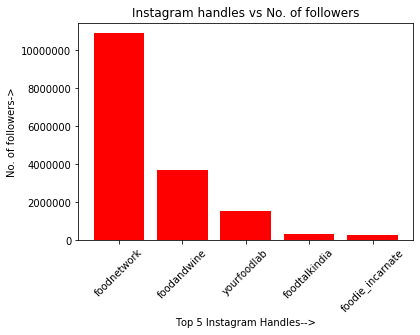

In [13]:
# plotting bar graph of Instagram handles vs No. of followers
plt.bar(top_5_handles,followers,color='red')
plt.xticks(rotation=45)
plt.xlabel('Top 5 Instagram Handles-->')
plt.ylabel('No. of followers->')
plt.title('Instagram handles vs No. of followers')
plt.ticklabel_format(axis='y',style='plain')
plt.show()

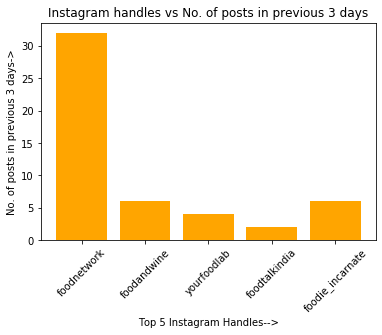

In [14]:
# plotting bar graph of Instagram handles vs No. of posts in previous 3 days
plt.bar(list(no_of_post_handles.keys()),list(no_of_post_handles.values()),color='orange')
plt.xticks(rotation=45)
plt.xlabel('Top 5 Instagram Handles-->')
plt.ylabel('No. of posts in previous 3 days->')
plt.title('Instagram handles vs No. of posts in previous 3 days')
plt.show()

## 2.1 Opening the 5 handles I obtained previously, and scraping the content of the first 10 posts of each handle.

In [15]:
#scraping the content of the first 10 posts of each handle.
def scrap_content_of_posts():
    list_content=[]
    for insta_handle in top_5_handles:
        driver.get('https://www.instagram.com/'+insta_handle)
        post=wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
        post.click()
        next_btn=wait.until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class,"coreSpriteRightPaginationArrow")]')))
        count=0
        while count<10:
            post_content=wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class="C4VMK"]/span')))
            text=BeautifulSoup(post_content.get_attribute('outerHTML'),'html.parser').text
            list_content.append(text)
            count+=1
            next_btn.click()
    return list_content   

In [16]:
#printing the content of each posts
list_content=scrap_content_of_posts()
for i in list_content:
    print(i)

Grandma's Tepong Pork (with @mollyyeh) 🥰Craving comfort food? You've got to try Grandma's Tepong Pork. The meat is so tender you won't need a knife!#GirlMeetsFarm > Sundays @ 11a|10cGet the recipe: http://foodtv.com/2KrJp9u.
How to Make @thepioneerwoman's Mini SundaesWe can't think of a better way to ring in the new year than with MINI sundae cups!! 🍨✨See more of @thepioneerwoman, Saturdays at 10a|9c.Get the recipe: http://foodtv.com/2KPHEDa (Head to our IGTV to get the clickable link!)
#DDD is rolling out... on @discoveryplus! 🎉 Starting Monday, you'll be able to stream @GuyFieri's epic road trips anytime you want 👏👏👏⁠. . .⁠Learn more about #discoveryplus and find updates at the link in our bio.⁠. . .⁠Plus, tune in to a HUGE 50-state marathon of #DDD happening *right now* and don't miss tonight's premiere in South Dakota at 9|8c 💥
@carlaphall Goes to Boot CampCarla Hall is headed to Boot Camp, but can she handle the new batch of #WorstCooks recruits?An all-new season of #WorstCooks pr

## 2.2 Preparing a list of all words used in all the scraped posts and calculating the frequency of each word

In [17]:
def get_frequency_of_words():
    dict_freq={}
    for i in list_content:
        for word in i.split():
            if word.startswith('#') or word.isalpha():
                dict_freq[word]=dict_freq.get(word,0)+1
    return dict_freq           

In [19]:
def prepare_list_of_words_with_frequency():
    list_word_freq=[]
    dict_freq=get_frequency_of_words()
    for word,freq in dict_freq.items():
        list_word_freq.append([word,freq])
    return list_word_freq    

## 2.3 Creating a csv file with two columns : the word and its frequency and storing all words and its frequency into it

In [20]:
list_word_freq=prepare_list_of_words_with_frequency()
df=pd.DataFrame(list_word_freq,columns=['Word','Frequency'])
df.head()

,Word,Frequency
0,Tepong,2
1,Pork,1
2,comfort,2
3,got,2
4,to,83


In [21]:
df.to_csv('word_frequency.csv',index=False)

## 2.4 Finding the hashtags that were most popular among these bloggers

In [24]:
def get_frequency_of_hashtags():
    hashtags=[]
    hashtags_count=[]
    dict_freq=get_frequency_of_words()
    for word,freq in dict_freq.items():
        if word.startswith('#'):
            hashtags.append(word)
            hashtags_count.append(freq)
    return hashtags,hashtags_count       

## 2.5 Plottng a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts

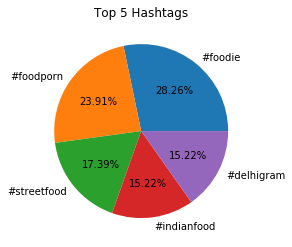

In [25]:
hashtags,hashtags_count=get_frequency_of_hashtags()
hashtags=np.array(hashtags)
hashtags_count=np.array(hashtags_count)
indices=np.argsort(hashtags_count)[::-1][:5]
top_5_hashtags=hashtags[indices]
top_5_hashtags_count=hashtags_count[indices]
plt.pie(top_5_hashtags_count,labels=top_5_hashtags,autopct='%.2f%%')
plt.title('Top 5 Hashtags')
plt.show()

## 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier

In [31]:
def get_likes_of_top_10_posts():
    likes_dict={}
    for insta_handle in top_5_handles:
        driver.get('https://www.instagram.com/'+insta_handle)
        post=wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
        post.click()
        next_btn=wait.until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class,"coreSpriteRightPaginationArrow")]')))
        c=0
        total_likes=0
        while c<10:
            like=''
            try:
                like=wait.until(EC.presence_of_element_located((By.XPATH, '//span[@class="vcOH2"]/span')))
            except:
                like=wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class="Nm9Fw"]//button[contains(@class,"sqdOP")]/span')))

            total_likes+=int(''.join(like.text.split(',')))
            c+=1     
            next_btn.click()
        likes_dict[insta_handle]=total_likes          
    return likes_dict

In [32]:
#printing the likes of all 5 instagram handles
likes_dict=get_likes_of_top_10_posts()
for handle in likes_dict:
    print(handle,likes_dict[handle])

foodnetwork 2055323
foodandwine 548007
yourfoodlab 1760931
foodtalkindia 11827
foodie_incarnate 290807


## 3.2 Calculating the average likes for each handle

In [33]:
likes=np.array(list(likes_dict.values()))
avg_likes=likes/10

## 3.3 Calculating like ratio for each handle 

In [34]:
like_ratio=followers/avg_likes

## 3.4 Creating a bar graph of Instagram handles vs Like ratio

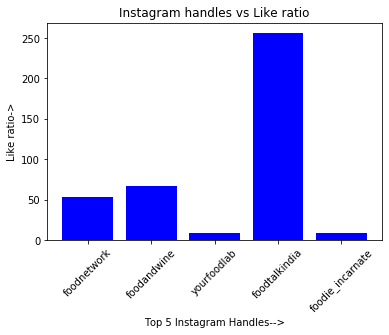

In [35]:
plt.bar(top_5_handles,like_ratio,color='blue')
plt.xticks(rotation=45)
plt.xlabel('Top 5 Instagram Handles-->')
plt.ylabel('Like ratio->')
plt.title('Instagram handles vs Like ratio')
plt.show()